# Introduction
This notebook is simply to get team thumbnail logos for a visualization.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# a small little ruse
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

In [3]:
json_URL = 'https://bdfed.stitch.mlbinfra.com/bdfed/mlb-stats/player/2022/en-US?sportId=1&contextTeamId='

In [4]:
response = requests.get(json_URL, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# save entire soup as a string
soup_string = str(soup.prettify)

# above step adds some text and tags, these need to be removed
soup_string = soup_string.replace('<bound method Tag.prettify of ', '')[:-1]

#json_object
json_object = json.loads(soup_string)


In [5]:
for key in json_object.keys():
    print(key)
    print(json_object[key])
    print('*'*40)

view
player
****************************************
sportIds
1
****************************************
season
2022
****************************************
seasonType
season
****************************************
filmroomLinkMin
2016
****************************************
status
{'isPreSeason': False, 'isRegularSeason': False, 'isPostSeason': False, 'isSeason': False, 'seasonOver': True, 'reachedAllStarDate': True, 'reachedPreSeason': True, 'reachedRegularSeason': True, 'reachedPostSeason': True}
****************************************
views
[{'text': 'Player', 'href': 'player'}, {'text': 'Team', 'href': 'team'}]
****************************************
tabs
[{'label': 'Hitting', 'title': 'Hitting Stats', 'value': 'playerHitting', 'id': 'playerHitting'}, {'label': 'Pitching', 'title': 'Pitching Stats', 'value': 'playerPitching', 'id': 'playerPitching'}]
****************************************
filters
{'playerHitting': {'dropdowns': [{'label': 'Season', 'dropdownId': 'season', '

In [6]:
json_object['columns'].keys()

dict_keys(['hittingExpanded', 'hittingStandard', 'pitchingExpanded', 'pitchingStandard', 'hittingExpandedMobile', 'hittingStandardMobile', 'pitchingExpandedMobile', 'pitchingStandardMobile'])

In [7]:
json_object["teams"]["s1"]

[{'label': 'Angels', 'value': 't108'},
 {'label': 'Astros', 'value': 't117'},
 {'label': 'Athletics', 'value': 't133'},
 {'label': 'Blue Jays', 'value': 't141'},
 {'label': 'Braves', 'value': 't144'},
 {'label': 'Brewers', 'value': 't158'},
 {'label': 'Cardinals', 'value': 't138'},
 {'label': 'Cubs', 'value': 't112'},
 {'label': 'D-backs', 'value': 't109'},
 {'label': 'Dodgers', 'value': 't119'},
 {'label': 'Giants', 'value': 't137'},
 {'label': 'Guardians', 'value': 't114'},
 {'label': 'Mariners', 'value': 't136'},
 {'label': 'Marlins', 'value': 't146'},
 {'label': 'Mets', 'value': 't121'},
 {'label': 'Nationals', 'value': 't120'},
 {'label': 'Orioles', 'value': 't110'},
 {'label': 'Padres', 'value': 't135'},
 {'label': 'Phillies', 'value': 't143'},
 {'label': 'Pirates', 'value': 't134'},
 {'label': 'Rangers', 'value': 't140'},
 {'label': 'Rays', 'value': 't139'},
 {'label': 'Red Sox', 'value': 't111'},
 {'label': 'Reds', 'value': 't113'},
 {'label': 'Rockies', 'value': 't115'},
 {'la

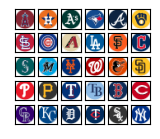

In [8]:
fig, axes = plt.subplots(ncols=6, nrows=5, figsize=(1.75,1.5))

for index, dic in enumerate(json_object["teams"]["s1"]):
    team_slug = dic['value']
    team_slug = team_slug.replace('t', '')
    logo_url = f'https://midfield.mlbstatic.com/v1/team/{team_slug}/spots/24'
    
    ax = axes[index//6][index%6]
    
    im = Image.open(requests.get(logo_url, stream=True).raw)
    imgplot=ax.imshow(im)
    
    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])



In [ ]:
# gold mine of player stats
# 'https://bdfed.stitch.mlbinfra.com/bdfed/transform-mlb-schedule?stitch_env=prod&sortTemplate=5&sportId=1&&sportId=51&startDate=2023-03-02&endDate=2023-03-04&gameType=E&&gameType=S&&gameType=R&&gameType=F&&gameType=D&&gameType=L&&gameType=W&&gameType=A&language=en&leagueId=104&&leagueId=103&&leagueId=160&contextTeamId='